<a href="https://colab.research.google.com/github/singh00in/AIML_New/blob/master/ComputerVision/Monkey_Species_Classification_Notebook_W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Introduction to Computer Vision - Image Processing</center></h1>

<center><p float="center">
  <img src="https://i.ibb.co/DgY2LG0T/Gemini-Generated-Image-70bq2r70bq2r70bq.jpg" width="720"/>
</p></center>

<center><font size=6>Monkey Species Classification</font></center>

# Problem Statement

## Business Context

In recent years, habitat destruction, climate change, and poaching have led to the extinction of several monkey species, with many more now endangered. To support conservation efforts, a U.S.-based wildlife sanctuary is gathering a vast collection of images of endangered monkey species from different parts of the world. This initiative aims to improve research and protection strategies for these animals.  

However, sorting and identifying species within this extensive collection is a major challenge, as many look similar and the volume of data is overwhelming. Without an efficient way to categorize these images, it becomes difficult to track populations, analyze trends, and make informed conservation decisions.  

To address this, the sanctuary is working on ways to refine how these images are processed and analyzed. By improving how species are identified and classified, conservationists will be able to gain better insights, making it easier to monitor wildlife and strengthen protection efforts.

## Objective

Develop an image classification model using an Artificial Neural Network (ANN) to categorize endangered monkey species efficiently. By leveraging image preprocessing techniques, the model aims to improve classification accuracy while operating within the sanctuary’s resource constraints, ultimately enhancing conservation efforts.

## Data Description

-  Due to the large volume of data, the images were converted to the images.npy file and the labels are also placed in Labels.csv, allowing you to work on the data without being concerned about the large data volume.
- The dataset comprises of 10 monkey species.

**List of Species**
- Mantled Howler
- Patas Monkey
- Bald Monkey
- Japanese Macaque
- Pygmy Marmoset
- White Headed Capuchin
- Silver Marmosetr
- Common Squirrel Monkey
- Black Headed Night Monkey
- Nilgiri Langur


####**Note: Please use GPU runtime to execute the code efficiently**


# Installing and Importing the Necessary Libraries

In [1]:
#Installing the necessary libraries
!pip install tensorflow==2.19.0 scikit-learn==1.6.1 seaborn==0.13.2 opencv-python==4.12.0.88 matplotlib==3.10.0 numpy==2.0.2 pandas==2.2.2 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

**Note:**
- The code snippet below helps ensure that the results are reproducible to a great extent.
- However, this is not always guaranteed, as Colab might assign different servers. Therefore, there may be slight variations in the results.

In [2]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# Loading the Data

In [3]:
# Uncomment and run the following code in case Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the image file of the dataset
rgb_images = np.load('/content/drive/My Drive/PG-AIML/ComputerVision/images_mls.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/My Drive/PG-AIML/ComputerVision/Labels_mls.csv')

# Data Overview


Let's print the shape of the images and labels

In [5]:
print(labels.head())

            Label
0  nilgiri_langur
1  nilgiri_langur
2  nilgiri_langur
3  nilgiri_langur
4  nilgiri_langur


In [6]:
print(labels['Label'].nunique())

10


In [7]:
print(rgb_images.shape)
print(labels.shape)

(1342, 128, 128, 3)
(1342, 1)


In [11]:
print(rgb_images.)

[[[134 166 142]
  [106 158 131]
  [ 80 147 121]
  ...
  [ 72 129 118]
  [ 67 108 104]
  [102 169 162]]

 [[114 160 131]
  [ 46 110  80]
  [ 26  99  68]
  ...
  [142 195 177]
  [130 164 155]
  [117 178 168]]

 [[ 56 111  82]
  [ 45 112  82]
  [ 25  89  60]
  ...
  [ 96 151 133]
  [100 131 122]
  [107 148 141]]

 ...

 [[226 242 243]
  [187 209 210]
  [209 227 228]
  ...
  [ 92 124 146]
  [123 153 172]
  [129 156 173]]

 [[222 242 242]
  [174 193 196]
  [201 212 216]
  ...
  [ 93 125 143]
  [ 99 125 139]
  [114 136 146]]

 [[197 226 226]
  [121 144 149]
  [149 164 167]
  ...
  [ 94 119 132]
  [120 139 145]
  [135 152 154]]]


There are 1342 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

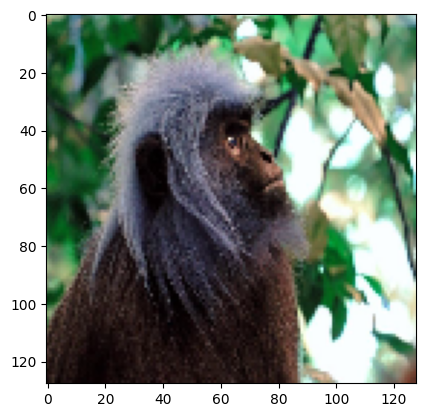

In [15]:
n = 0
plt.imshow(rgb_images[2])

# Exploratory Data Analysis

This function, `plot_images`, randomly selects images from a dataset and displays them in a 3x4 grid. It retrieves corresponding labels from a dictionary and sets them as titles for each image.

In [19]:
keys=dict(labels['Label'])
print(keys)

{0: 'nilgiri_langur', 1: 'nilgiri_langur', 2: 'nilgiri_langur', 3: 'nilgiri_langur', 4: 'nilgiri_langur', 5: 'nilgiri_langur', 6: 'nilgiri_langur', 7: 'nilgiri_langur', 8: 'nilgiri_langur', 9: 'nilgiri_langur', 10: 'nilgiri_langur', 11: 'nilgiri_langur', 12: 'nilgiri_langur', 13: 'nilgiri_langur', 14: 'nilgiri_langur', 15: 'nilgiri_langur', 16: 'nilgiri_langur', 17: 'nilgiri_langur', 18: 'nilgiri_langur', 19: 'nilgiri_langur', 20: 'nilgiri_langur', 21: 'nilgiri_langur', 22: 'nilgiri_langur', 23: 'nilgiri_langur', 24: 'nilgiri_langur', 25: 'nilgiri_langur', 26: 'nilgiri_langur', 27: 'nilgiri_langur', 28: 'nilgiri_langur', 29: 'nilgiri_langur', 30: 'nilgiri_langur', 31: 'nilgiri_langur', 32: 'nilgiri_langur', 33: 'nilgiri_langur', 34: 'nilgiri_langur', 35: 'nilgiri_langur', 36: 'nilgiri_langur', 37: 'nilgiri_langur', 38: 'nilgiri_langur', 39: 'nilgiri_langur', 40: 'nilgiri_langur', 41: 'nilgiri_langur', 42: 'nilgiri_langur', 43: 'nilgiri_langur', 44: 'nilgiri_langur', 45: 'nilgiri_langur

In [24]:
def plot_images(images,labels):
    keys=dict(labels['Label'])
    rows = 3
    cols = 4
    fig = plt.figure(figsize=(10, 8))
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(0, len(labels))
            ax = fig.add_subplot(rows, cols, i * rows + j + 1)
            ax.imshow(images[random_index, :])
            ax.set_title(keys[random_index])
    plt.show()

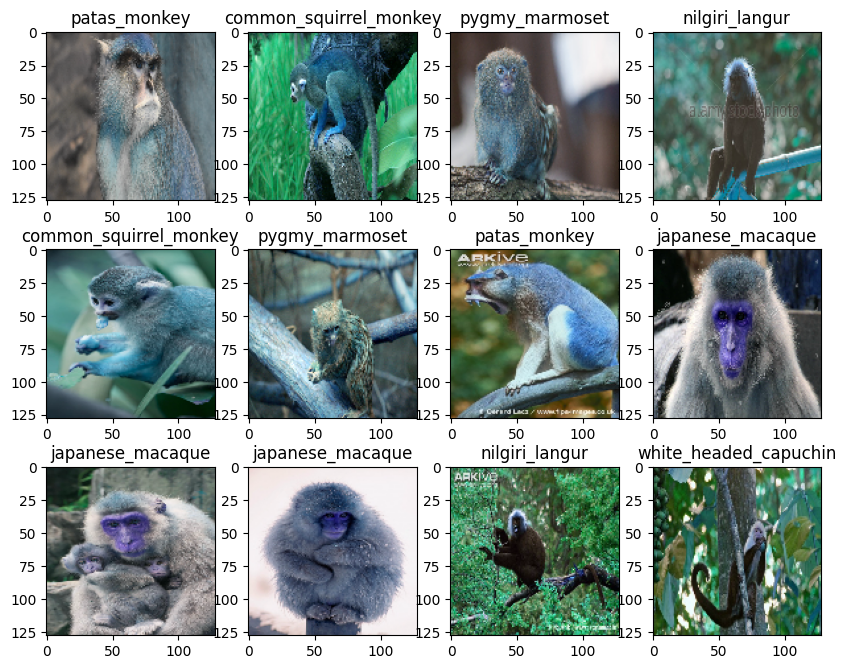

In [25]:
plot_images(rgb_images,labels)

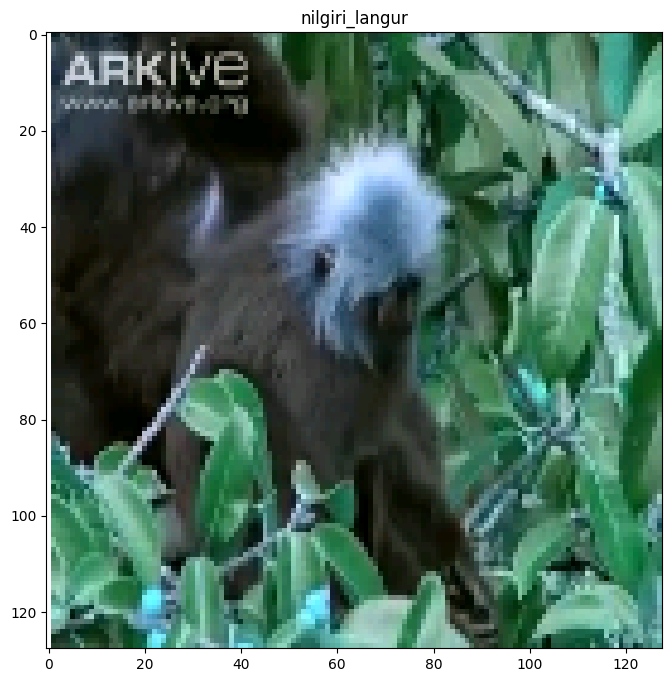

In [23]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(rgb_images[1])
ax.set_title(keys[1])
plt.show()

### Checking for class imbalance

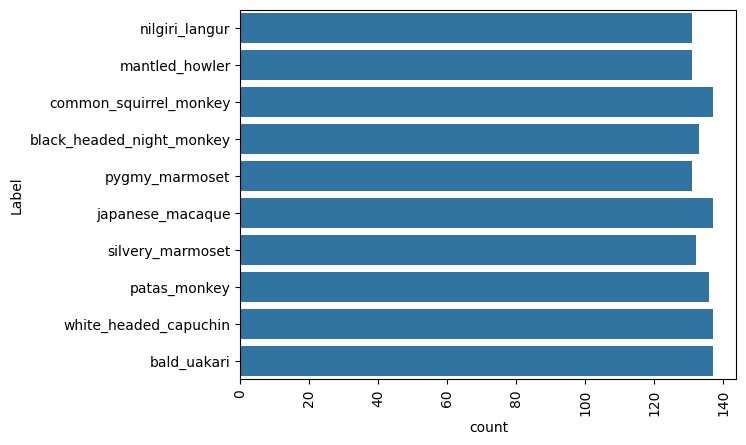

In [26]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical');

- As you can see from the above plot, the dataset is quite balanced.
- There are about 135 images in each category

# Data Preprocessing

We define a function, ***`grid_plot`***, to display two images side by side: the original image and its processed version. It helps visually compare the effects of image processing techniques.

**Inputs:**

- `img1`: The original image.

- `img2`: The processed image

- `gray` (optional, default: False): If True, displays the processed image in grayscale.

**Output:**
- The original image displayed on the left and the processed image on the right.


In [27]:
# Function to plot the original and processed images side by side
def grid_plot(img1,img2,gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img1)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    if gray:
      axes[1].imshow(img2,cmap='gray')
    else:
      axes[1].imshow(img2)
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

    plt.show()

## Grayscale

In [28]:
gray_images = []
for i in range(len(rgb_images)):
  gray_images.append(cv2.cvtColor(rgb_images[i], cv2.COLOR_RGB2GRAY))

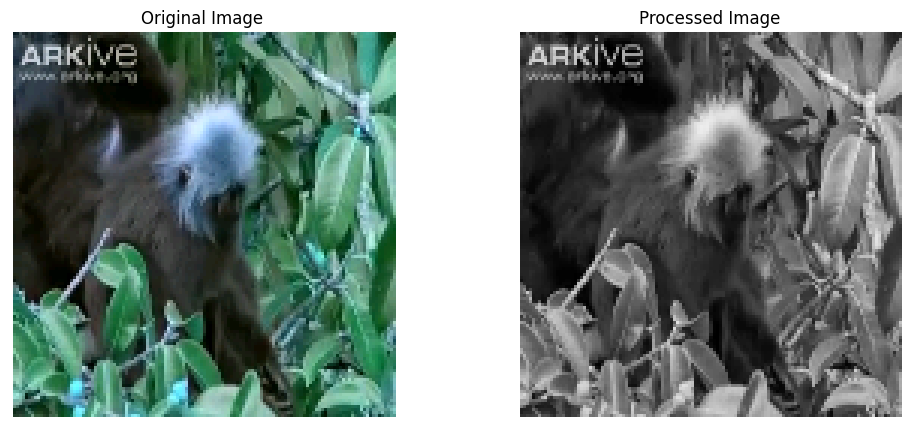

In [30]:
# choosing an image
n = 1
# plotting the original and preprocessed image
grid_plot(rgb_images[n],gray_images[n],gray=True)

- As expected, the RGB component is removed.  

- If the species are not distinguished based on color, then this feature will be highly beneficial as it also reduces computational requirements.

## Gaussian blur

In [31]:
gaus_blur_images = []
for i in range(len(gray_images)):
  gaus_blur_images.append(cv2.GaussianBlur(rgb_images[i], (3,3), 0))

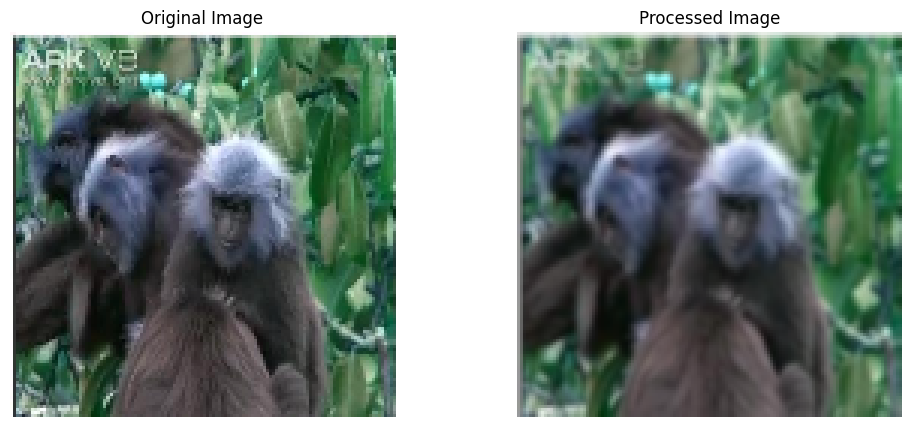

In [32]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(rgb_images[n],gaus_blur_images[n])

- The Gaussian blur provides a smoothing effect.

- This will be useful if the images are too sharp, as it also helps reduce noise.

## Laplacian Filter

Instead of using the original RGB images, we'll be applying the Laplacian filter on the grayscale images as

- Grayscale images have only one intensity channel, making it straightforward to apply the Laplacian operator without dealing with color channel complexities.
- Laplacian filtering relies on detecting changes in pixel intensity, which is directly represented in grayscale images.
- Applying Laplacian on grayscale avoids color noise amplification, leading to clearer edge detection results compared to noisy outputs from color images.

In [33]:
edge_images = []
for i in range(len(gray_images)):
    edge_images.append(cv2.Laplacian(gray_images[i],cv2.CV_64F))

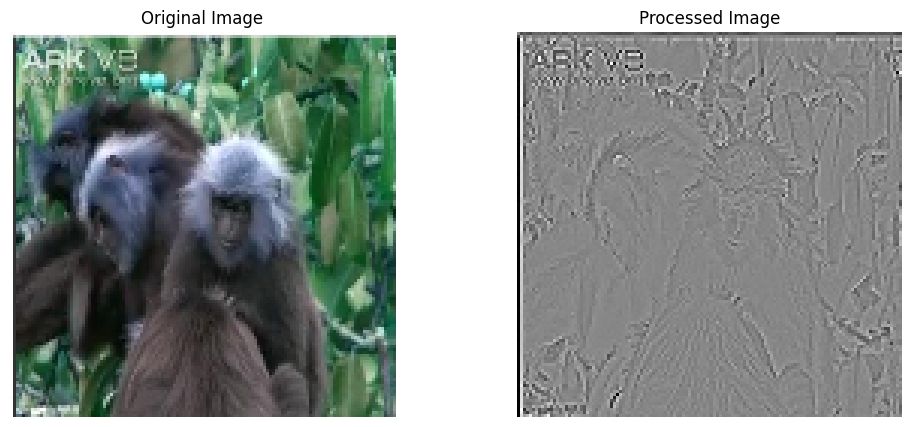

In [34]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(rgb_images[n],edge_images[n],gray=True)

- Based on this, the edge feature does not appear to be useful.

- It is also capturing the background. If we isolate the monkey from the background, this feature might become useful.

## Splitting the dataset

**Splitting RGB Images**

In [35]:
# Splitting the dataset into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets
X_train_rgb, X_temp_rgb, y_train_rgb, y_temp_rgb = train_test_split(np.array(rgb_images),labels , test_size=0.2, random_state=42,stratify=labels)
# Splitting the temporary set further into validation (50%) and test (50%) sets
# This results in 10% validation and 10% test data from the original dataset
X_val_rgb, X_test_rgb, y_val_rgb, y_test_rgb = train_test_split(X_temp_rgb,y_temp_rgb , test_size=0.5, random_state=42,stratify=y_temp_rgb)

**Splitting Grayscale images**

In [36]:
# Splitting the dataset into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets
X_train_gray, X_temp_gray, y_train, y_temp = train_test_split(np.array(gray_images),labels , test_size=0.2, random_state=42,stratify=labels)
# Splitting the temporary set further into validation (50%) and test (50%) sets
# This results in 10% validation and 10% test data from the original dataset
X_val_gray, X_test_gray, y_val, y_test = train_test_split(X_temp_gray,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

**splitting Gausian blur data**

In [37]:
# Splitting the dataset into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets
X_train_blur, X_temp_blur, y_train_blur, y_temp_blur = train_test_split(np.array(gaus_blur_images),labels , test_size=0.2, random_state=42,stratify=labels)
# Splitting the temporary set further into validation (50%) and test (50%) sets
# This results in 10% validation and 10% test data from the original dataset
X_val_blur, X_test_blur, y_val_blur, y_test_blur = train_test_split(X_temp_blur,y_temp_blur,test_size=0.5, random_state=42,stratify=y_temp_blur)

**splitting Laplacian Blur data**

In [38]:
# Splitting the dataset into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets
X_train_edge, X_temp_edge, y_train_edge, y_temp_edge = train_test_split(np.array(edge_images),labels , test_size=0.2, random_state=42,stratify=labels)
# Splitting the temporary set further into validation (50%) and test (50%) sets
# This results in 10% validation and 10% test data from the original dataset
X_val_edge, X_test_edge, y_val_edge, y_test_edge = train_test_split(X_temp_edge,y_temp_edge,test_size=0.5, random_state=42,stratify=y_temp_edge)

## Encoding the target labels

- Convert labels from categories to one hot vectors

- `LabelBinarizer` is a preprocessing utility in `sklearn.preprocessing` that converts categorical labels into a binary (one-hot) representation.

  - It is useful for transforming multi-class labels into a format suitable for models that require numerical input.

  - `fit_transform()` learns the unique classes from the data and converts labels into a binary format in one step.

  - `transform()` converts new data using the already learned classes without refitting.


In [39]:
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train_rgb)
y_val_encoded = enc.transform(y_val_rgb)
y_test_encoded = enc.transform(y_test_rgb)

In [40]:
print(y_train_encoded[0])

[1 0 0 0 0 0 0 0 0 0]


## Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [41]:
# Normalizing the image pixels
X_train_rgb = X_train_rgb.astype('float32')/255.0
X_val_rgb = X_val_rgb.astype('float32')/255.0
X_test_rgb = X_test_rgb.astype('float32')/255.0

In [42]:
# Normalizing the image pixels
X_train_gray = X_train_gray.astype('float32')/255.0
X_val_gray = X_val_gray.astype('float32')/255.0
X_test_gray = X_test_gray.astype('float32')/255.0

In [43]:
# Normalizing the image pixels
X_train_blur = X_train_blur.astype('float32')/255.0
X_val_blur = X_val_blur.astype('float32')/255.0
X_test_blur = X_test_blur.astype('float32')/255.0

In [44]:
# Normalizing the image pixels
X_train_edge = X_train_edge.astype('float32')/255.0
X_val_edge = X_val_edge.astype('float32')/255.0
X_test_edge = X_test_edge.astype('float32')/255.0

# Model Building

## Utility Functions

In [45]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [46]:
def plot_confusion_matrix(model,predictors,target):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

## ANN with RGB Images

In [47]:
num_classes = labels['Label'].nunique()
image_size = X_train_rgb[0].size
shape = X_train_rgb.shape[1:]

In [48]:
model_1 = Sequential()
model_1.add(Input(shape=(shape[0],shape[1],shape[2])))
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_1.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_1.add(Dense(num_classes, activation='softmax'))

In [49]:
adam = optimizers.Adam()
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [50]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,626,730 (48.17 MB)

 Trainable params: 12,626,730 (48.17 MB)

 Non-trainable params: 0 (0.00 B)

Efficiently iterating over image data is crucial for training deep learning models, especially when working with large datasets.
Keras provides the `ImageDataGenerator` class to handle real-time data loading and augmentation during model training.

- `ImageDataGenerator` in Keras is used to efficiently load and iterate over image datasets during model training.

  - The `flow()` function generates batches of images from in-memory NumPy arrays (X, y), providing a convenient way to feed data into a neural network.

In [51]:
train_datagen = ImageDataGenerator()

In [52]:
history_1 = model_1.fit(train_datagen.flow(X_train_rgb,y_train_encoded,batch_size=128),validation_data = (X_val_rgb,y_val_encoded),epochs=20, verbose=2)

Epoch 1/20
9/9 - 6s - 659ms/step - accuracy: 0.1081 - loss: 20.2911 - val_accuracy: 0.1119 - val_loss: 12.2167
Epoch 2/20
9/9 - 0s - 43ms/step - accuracy: 0.0857 - loss: 8.4936 - val_accuracy: 0.1791 - val_loss: 5.1892
Epoch 3/20
9/9 - 0s - 44ms/step - accuracy: 0.1445 - loss: 4.2084 - val_accuracy: 0.1194 - val_loss: 4.1697
Epoch 4/20
9/9 - 0s - 43ms/step - accuracy: 0.1510 - loss: 3.1239 - val_accuracy: 0.2164 - val_loss: 2.5284
Epoch 5/20
9/9 - 0s - 44ms/step - accuracy: 0.1650 - loss: 2.4971 - val_accuracy: 0.1940 - val_loss: 2.1376
Epoch 6/20
9/9 - 0s - 43ms/step - accuracy: 0.2721 - loss: 2.0217 - val_accuracy: 0.3134 - val_loss: 1.9542
Epoch 7/20
9/9 - 0s - 44ms/step - accuracy: 0.3131 - loss: 1.9069 - val_accuracy: 0.2612 - val_loss: 1.9749
Epoch 8/20
9/9 - 0s - 40ms/step - accuracy: 0.3290 - loss: 1.9025 - val_accuracy: 0.3657 - val_loss: 1.8267
Epoch 9/20
9/9 - 0s - 39ms/step - accuracy: 0.3541 - loss: 1.8293 - val_accuracy: 0.3433 - val_loss: 1.8722
Epoch 10/20
9/9 - 0s - 40

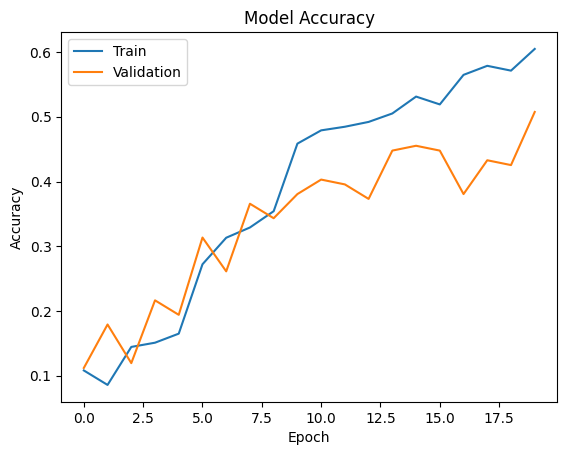

In [53]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
model_1_train_perf = model_performance_classification(model_1, X_train_rgb,y_train_encoded)

print("Train performance metrics")
print(model_1_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.683131  0.683131   0.725273  0.683811


In [55]:
model_1_valid_perf = model_performance_classification(model_1, X_val_rgb,y_val_encoded)

print("Validation performance metrics")
print(model_1_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.507463  0.507463    0.57071  0.506102


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


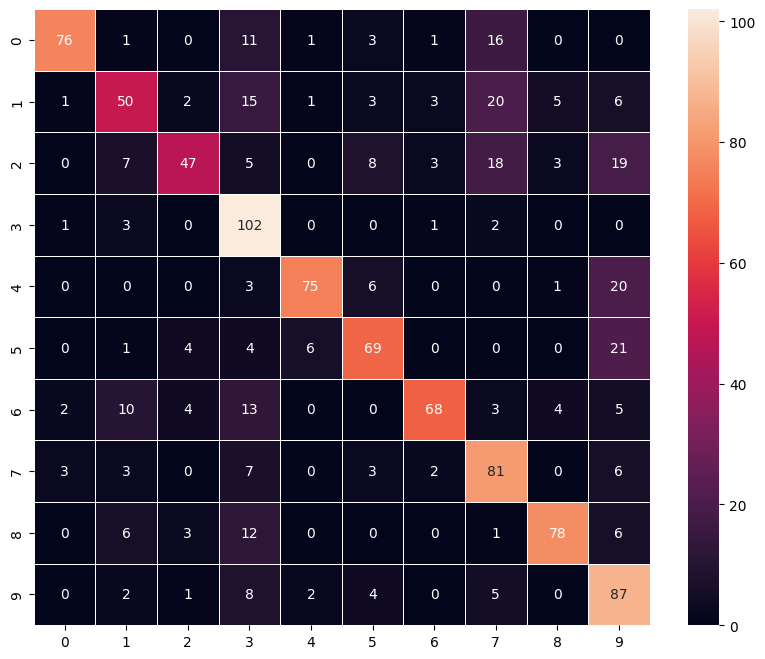

In [56]:
plot_confusion_matrix(model_1,X_train_rgb,y_train_encoded)

The accuracy on the training set is ~ 64% and the validation accuracy is ~ 48%.

## ANN with Grayscale Images

In [57]:
num_classes = labels['Label'].nunique()
X_train_gray = np.expand_dims(X_train_gray,axis=-1)
X_val_gray = np.expand_dims(X_val_gray, axis=-1)
image_size = X_train_gray[0].size
shape = X_train_gray.shape[1:]

In [58]:
X_val_gray.shape

(134, 128, 128, 1)

In [59]:
X_train_gray.shape

(1073, 128, 128, 1)

In [60]:
model_2 = Sequential()
model_2.add(Input(shape=(shape[0],shape[1],shape[2])))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_2.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_2.add(Dense(num_classes, activation='softmax'))

In [61]:
adam = optimizers.Adam()
model_2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [62]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,238,122 (16.17 MB)

 Trainable params: 4,238,122 (16.17 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
train_datagen = ImageDataGenerator()

In [64]:
history_2 = model_2.fit(train_datagen.flow(X_train_gray,y_train_encoded,batch_size=128),validation_data = (X_val_gray,y_val_encoded),epochs=20, verbose=2)

Epoch 1/20
9/9 - 2s - 255ms/step - accuracy: 0.1016 - loss: 4.8796 - val_accuracy: 0.0970 - val_loss: 3.3847
Epoch 2/20
9/9 - 0s - 33ms/step - accuracy: 0.1295 - loss: 2.7876 - val_accuracy: 0.2239 - val_loss: 2.4324
Epoch 3/20
9/9 - 0s - 28ms/step - accuracy: 0.1873 - loss: 2.2623 - val_accuracy: 0.1642 - val_loss: 2.2736
Epoch 4/20
9/9 - 0s - 30ms/step - accuracy: 0.1845 - loss: 2.2001 - val_accuracy: 0.2164 - val_loss: 2.1612
Epoch 5/20
9/9 - 0s - 29ms/step - accuracy: 0.2321 - loss: 2.1717 - val_accuracy: 0.2090 - val_loss: 2.0762
Epoch 6/20
9/9 - 0s - 33ms/step - accuracy: 0.2255 - loss: 2.1241 - val_accuracy: 0.1940 - val_loss: 2.0324
Epoch 7/20
9/9 - 0s - 29ms/step - accuracy: 0.2637 - loss: 2.0819 - val_accuracy: 0.2612 - val_loss: 2.0702
Epoch 8/20
9/9 - 0s - 27ms/step - accuracy: 0.3131 - loss: 2.0197 - val_accuracy: 0.2463 - val_loss: 2.0327
Epoch 9/20
9/9 - 0s - 20ms/step - accuracy: 0.3113 - loss: 1.9546 - val_accuracy: 0.2612 - val_loss: 1.9868
Epoch 10/20
9/9 - 0s - 22ms

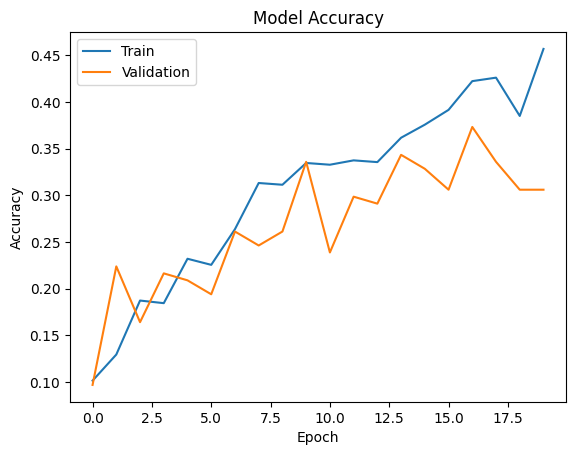

In [65]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [66]:
model_2_train_perf = model_performance_classification(model_2, X_train_gray,y_train_encoded)

print("Train performance metrics")
print(model_2_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.451072  0.451072   0.519239  0.419314


In [67]:
model_2_valid_perf = model_performance_classification(model_2, X_val_gray,y_val_encoded)

print("Validation performance metrics")
print(model_2_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Validation performance metrics
   Accuracy   Recall  Precision  F1 Score
0   0.30597  0.30597   0.311126  0.287651


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


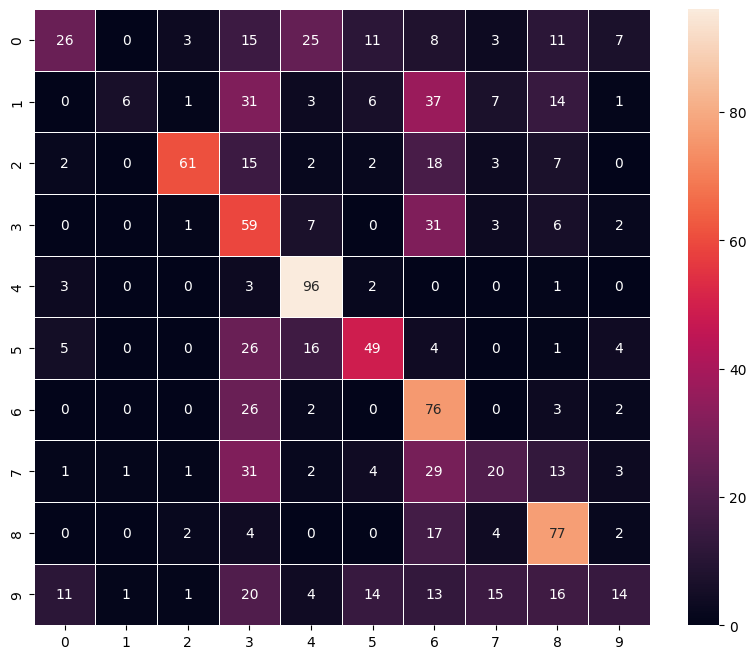

In [68]:
plot_confusion_matrix(model_2,X_train_gray,y_train_encoded)

- The accuracy on both the training and validation sets is poor.  

- This suggests that the color component plays a crucial role in distinguishing monkey species.

## ANN with Gaussian-blurred Images

In [69]:
num_classes = labels['Label'].nunique()

image_size = X_train_blur[0].size
shape = X_train_blur.shape[1:]

In [70]:
model_3 = Sequential()
model_3.add(Input(shape=(shape[0],shape[1],shape[2])))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_3.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_3.add(Dense(num_classes, activation='softmax'))

In [71]:
adam = optimizers.Adam()
model_3.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [72]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,626,730 (48.17 MB)

 Trainable params: 12,626,730 (48.17 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
train_datagen = ImageDataGenerator()

In [74]:
history_3 = model_3.fit(train_datagen.flow(X_train_blur,y_train_encoded,batch_size=128),validation_data = (X_val_blur,y_val_encoded),epochs=20, verbose=2)

Epoch 1/20
9/9 - 2s - 206ms/step - accuracy: 0.0923 - loss: 15.2361 - val_accuracy: 0.0970 - val_loss: 10.5560
Epoch 2/20
9/9 - 0s - 46ms/step - accuracy: 0.1062 - loss: 9.2043 - val_accuracy: 0.1493 - val_loss: 4.5449
Epoch 3/20
9/9 - 0s - 35ms/step - accuracy: 0.1612 - loss: 4.1491 - val_accuracy: 0.2015 - val_loss: 2.9882
Epoch 4/20
9/9 - 0s - 42ms/step - accuracy: 0.2255 - loss: 2.9255 - val_accuracy: 0.2612 - val_loss: 2.8111
Epoch 5/20
9/9 - 0s - 42ms/step - accuracy: 0.2283 - loss: 2.4995 - val_accuracy: 0.2388 - val_loss: 2.2295
Epoch 6/20
9/9 - 0s - 38ms/step - accuracy: 0.2908 - loss: 2.0325 - val_accuracy: 0.2612 - val_loss: 2.0030
Epoch 7/20
9/9 - 0s - 40ms/step - accuracy: 0.3243 - loss: 1.8707 - val_accuracy: 0.2612 - val_loss: 2.0482
Epoch 8/20
9/9 - 0s - 38ms/step - accuracy: 0.3681 - loss: 1.8032 - val_accuracy: 0.2985 - val_loss: 1.7389
Epoch 9/20
9/9 - 0s - 41ms/step - accuracy: 0.4212 - loss: 1.5910 - val_accuracy: 0.3731 - val_loss: 1.8183
Epoch 10/20
9/9 - 0s - 39

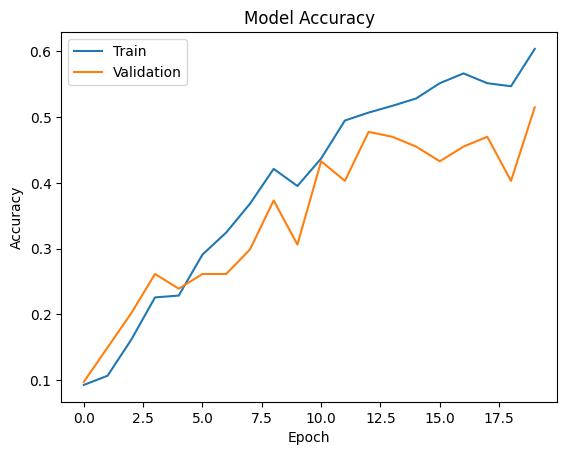

In [75]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [76]:
model_3_train_perf = model_performance_classification(model_3, X_train_blur,y_train_encoded)

print("Train performance metrics")
print(model_3_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.659832  0.659832   0.702011  0.656438


In [77]:
model_3_valid_perf = model_performance_classification(model_3, X_val_blur,y_val_encoded)

print("Validation performance metrics")
print(model_3_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.514925  0.514925   0.590594  0.494749


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


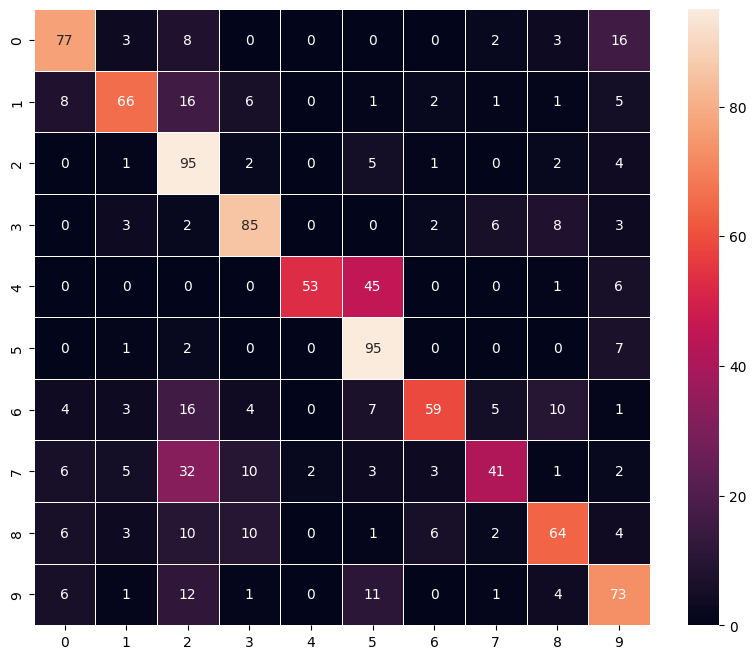

In [78]:
plot_confusion_matrix(model_3,X_train_blur,y_train_encoded)

- The smoothing effect doesn't improve accuracy significantly. One possible reason is that it may blur important details, such as the eyes.

## ANN with Laplacian-Filtered Image

In [79]:
num_classes = labels['Label'].nunique()
X_train_edge = np.expand_dims(X_train_edge,axis=-1)
X_val_edge = np.expand_dims(X_val_edge,axis=-1)
image_size = X_train_edge[0].size
shape = X_train_edge.shape[1:]

In [80]:
model_4 = Sequential()
model_4.add(Input(shape=(shape[0],shape[1],shape[2])))
model_4.add(Flatten())
model_4.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_4.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_4.add(Dense(num_classes, activation='softmax'))

In [81]:
adam = optimizers.Adam()
model_4.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [82]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,238,122 (16.17 MB)

 Trainable params: 4,238,122 (16.17 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
train_datagen = ImageDataGenerator()

In [84]:
history_4 = model_4.fit(train_datagen.flow(X_train_edge,y_train_encoded,batch_size=128),validation_data = (X_val_edge,y_val_encoded),epochs=20, verbose=2)

Epoch 1/20
9/9 - 2s - 185ms/step - accuracy: 0.1491 - loss: 2.2735 - val_accuracy: 0.2313 - val_loss: 2.1801
Epoch 2/20
9/9 - 0s - 20ms/step - accuracy: 0.7344 - loss: 1.3802 - val_accuracy: 0.2761 - val_loss: 2.0285
Epoch 3/20
9/9 - 0s - 21ms/step - accuracy: 0.9590 - loss: 0.5863 - val_accuracy: 0.3209 - val_loss: 1.9781
Epoch 4/20
9/9 - 0s - 21ms/step - accuracy: 0.9944 - loss: 0.1772 - val_accuracy: 0.3209 - val_loss: 2.0885
Epoch 5/20
9/9 - 0s - 20ms/step - accuracy: 0.9991 - loss: 0.0419 - val_accuracy: 0.3284 - val_loss: 2.2734
Epoch 6/20
9/9 - 0s - 22ms/step - accuracy: 1.0000 - loss: 0.0114 - val_accuracy: 0.3209 - val_loss: 2.4259
Epoch 7/20
9/9 - 0s - 23ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.2985 - val_loss: 2.4668
Epoch 8/20
9/9 - 0s - 21ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.2985 - val_loss: 2.4895
Epoch 9/20
9/9 - 0s - 21ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.2985 - val_loss: 2.5131
Epoch 10/20
9/9 - 0s - 21ms

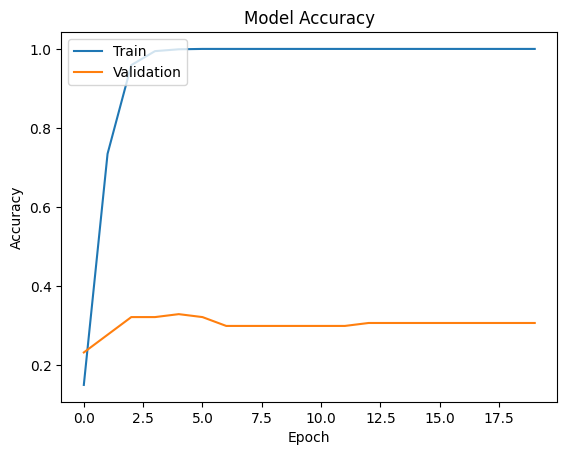

In [85]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [86]:
model_4_train_perf = model_performance_classification(model_4, X_train_edge,y_train_encoded)

print("Train performance metrics")
print(model_4_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


In [87]:
model_4_valid_perf = model_performance_classification(model_4, X_val_edge,y_val_encoded)

print("Validation performance metrics")
print(model_4_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Validation performance metrics
   Accuracy   Recall  Precision  F1 Score
0   0.30597  0.30597   0.349824  0.315044


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


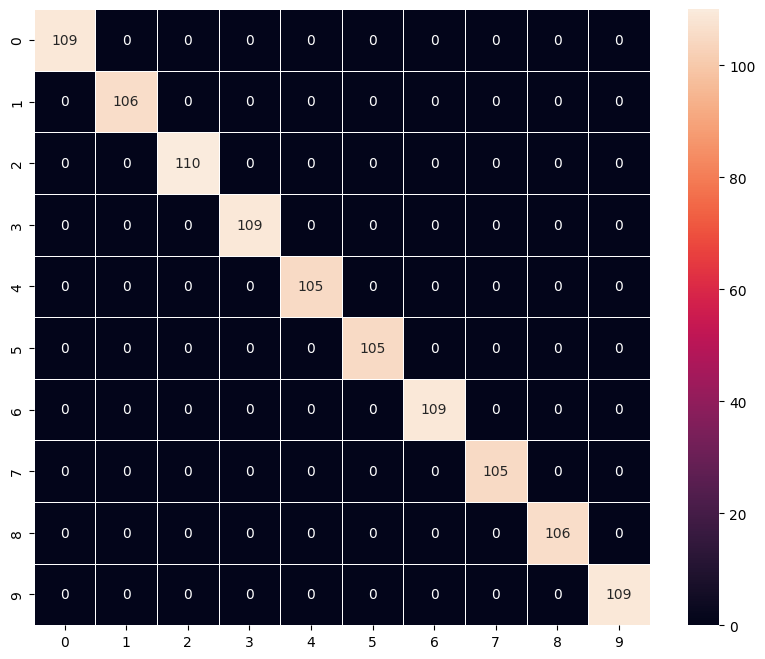

In [88]:
plot_confusion_matrix(model_4,X_train_edge,y_train_encoded)

- With the edge feature, the model has achieved a perfect score on the training set.  

- However, on the validation set, it has achieved only 32% accuracy, indicating severe overfitting.  

- Since edge-level features are basic, the model has merely memorized them, effectively turning species prediction into a lookup table.

# Model Performance Comparison and Final Model Selection

In [89]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "ANN with RGB Images","ANN with Grayscale Images","ANN with Gaussian-blurred Images","ANN with Laplacian-Filtered Image"
]

In [90]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "ANN with RGB Images","ANN with Grayscale Images","ANN with Gaussian-blurred Images","ANN with Laplacian-Filtered Image"
]

In [91]:
models_train_comp_df

,ANN with RGB Images,ANN with Grayscale Images,ANN with Gaussian-blurred Images,ANN with Laplacian-Filtered Image
Accuracy,0.683131,0.451072,0.659832,1.0
Recall,0.683131,0.451072,0.659832,1.0
Precision,0.725273,0.519239,0.702011,1.0
F1 Score,0.683811,0.419314,0.656438,1.0


In [92]:
models_valid_comp_df

,ANN with RGB Images,ANN with Grayscale Images,ANN with Gaussian-blurred Images,ANN with Laplacian-Filtered Image
Accuracy,0.507463,0.305970,0.514925,0.305970
Recall,0.507463,0.305970,0.514925,0.305970
Precision,0.570710,0.311126,0.590594,0.349824
F1 Score,0.506102,0.287651,0.494749,0.315044


In [93]:
models_train_comp_df - models_valid_comp_df

,ANN with RGB Images,ANN with Grayscale Images,ANN with Gaussian-blurred Images,ANN with Laplacian-Filtered Image
Accuracy,0.175669,0.145102,0.144907,0.694030
Recall,0.175669,0.145102,0.144907,0.694030
Precision,0.154563,0.208113,0.111417,0.650176
F1 Score,0.177709,0.131662,0.161689,0.684956


- We observe that the ANN with edge features has achieved a perfect accuracy score on the training set, but only ~ 32% on the validation set.  
  - This suggests that either the model is overfitting or the edge feature is not effective for generalization.  

- The ANN with the RGB feature has achieved an accuracy of ~ 64% on the training set and ~ 48% on the validation set. The smaller gap indicates that the color feature is useful in distinguishing monkey species.  

- For the other two features, the accuracy score is below 50%, which is poor.

Considering this, we should select the model trained on RGB features as the best option, as it demonstrates a better balance between training and validation performance, indicating its effectiveness in distinguishing monkey species.

## Test Performance

In [94]:
model_1_test_perf = model_performance_classification(model_1,X_test_rgb,y_test_encoded)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [95]:
model_1_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.422222,0.422222,0.424932,0.407345


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


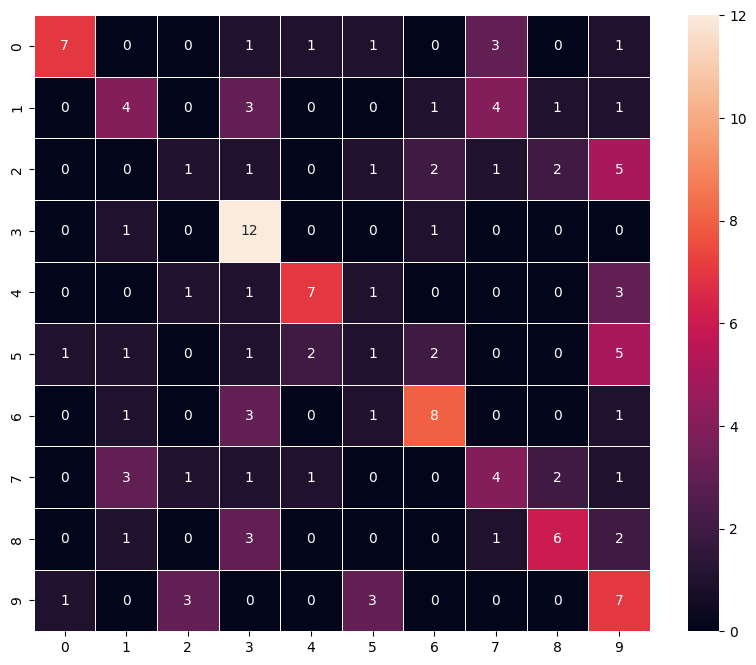

In [96]:
plot_confusion_matrix(model_1, X_test_rgb,y_test_encoded)

#  Business Insights and Recommendations

- The ANN trained on RGB features demonstrates the best performance, making color a key distinguishing factor for monkey species.  
- Edge-based features cause overfitting, indicating they are ineffective without additional processing like background removal.  
- Features other than RGB and edges yield poor accuracy (<0.5), suggesting they lack sufficient distinguishing power.  
- Deploy the RGB-based model as the primary solution for species classification.  
- If edge features are to be used, implement preprocessing techniques such as background isolation to improve generalization.  
- Optimize the model for real-time classification by exploring lightweight architectures to reduce computational costs.  
- Investigate additional feature engineering approaches, such as texture or shape analysis, to enhance model robustness.

<font size=4> **Note:** This week, we used ANN to classify images, but it's not the most effective approach since ANN cannot fully capture the unique properties of images. Next week, we'll tackle the same business problem using CNN, which is better suited for image processing. More to come next week! </font>

<font size=5 color='blue'>Power Ahead!</font>
___